# Librerías

In [1]:
# ! pip install optuna
import optuna
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, classification_report, mean_absolute_error
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, auc, r2_score, recall_score, f1_score
import random
import tensorflow as tf
from mpl_toolkits.mplot3d import Axes3D
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer , TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as PipelineRes
from sklearn.impute import SimpleImputer
import streamlit as st
import joblib
import warnings
warnings.simplefilter('ignore')

import shap


c:\Users\garci\OneDrive\Escritorio\TUIA\Aprendizaje Automatico 1\tp1\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

Antes reemplazamos 'Yes' y 'No', por 1 y 0 respectivamente

In [3]:
train_data['RainTomorrow'] = train_data['RainTomorrow'].map({'Yes': 1, 'No': 0})
test_data['RainTomorrow'] = test_data['RainTomorrow'].map({'Yes': 1, 'No': 0})

In [4]:
X_train_class = train_data.drop(columns = ["RainTomorrow" , "RainfallTomorrow"], axis = 1 )
y_train_class = train_data['RainTomorrow']
X_test_class = test_data.drop(columns =[ "RainTomorrow" , "RainfallTomorrow"], axis = 1)
y_test_class = test_data['RainTomorrow']

# Algoritmos de Clasificacion

Regresion Logistica

Para realizar una clasificacion necesitamos redefinir nuestra variable target, ya que en este caso sera la variable Categorica "RainTomorrow_Yes"

In [5]:
numeric_class_features = X_train_class.select_dtypes(exclude=['object']).columns.tolist()
categorical_class_features = X_train_class.select_dtypes(include=['object']).columns.tolist()

In [6]:
numeric_class_features

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindSpeed',
 'Humidity',
 'Pressure',
 'Cloud',
 'Año',
 'Mes',
 'Dia']

In [7]:
categorical_class_features


['Location', 'RainToday', 'WindDir']

In [8]:
len(numeric_class_features) + len(categorical_class_features)

15

In [9]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor_Class = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_class_features),
        ('cat', categorical_transformer, categorical_class_features)
    ])


In [10]:
#Hacemos un pipeline con un standar scaler como normalizador
LogReg_Model = Pipeline(steps=[('preprocessor', preprocessor_Class), ('classifier', LogisticRegression(class_weight='balanced'))])

In [11]:
#Entrenamos el modelo 
LogReg_Model.fit(X_train_class, y_train_class)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['MinTemp', 'MaxTemp',
                                                   'Rainfall', 'Evaporation',
                                                   'Sunshine', 'WindSpeed',
                                                   'Humidity', 'Pressure',
                                                   'Cloud', 'Año', 'Mes',
                                                   'Dia']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Location', 'RainToday',
                                                   'WindDir'])])),
                ('classifier', LogisticRegression(class_weight='balanced'))])

In [12]:
# y_pred contendrá las predicciones del modelo para el conjunto de prueba
LogReg_Pred = LogReg_Model.predict(X_test_class)

In [13]:
print(LogReg_Model[1].coef_)
print(LogReg_Model[1].intercept_)

[[ 5.64382312e-02  2.10030195e-01  1.04249115e-01 -5.28701805e-02
  -5.97815726e-01  3.69933272e-01  7.68331291e-01 -4.36931732e-01
   2.26419554e-01 -4.19969109e-03  1.60803339e-01 -2.80955029e-02
  -1.37793541e-01 -7.61612965e-04 -3.66348523e-01  3.27798786e-01
   1.77583005e-01 -9.22556110e-02  9.27337253e-02 -1.13111337e-01
  -4.31033305e-01  2.18073847e-01  2.75400763e-01 -3.10192560e-01
   3.00208271e-01  3.17339332e-01  1.19607641e-02 -1.47224574e-01
   3.12859808e-02  7.79437678e-02  3.06411039e-01  1.13654019e-02
  -2.02369324e-01 -2.78414266e-01 -6.71656855e-02]]
[-0.43555587]


print(LogReg_Model[1].coef_): Nos muestra los coeficientes del modelo de regresión logística. Los coeficientes representan el peso o la importancia de cada característica en el modelo. Cada coeficiente se asocia con una característica específica en el mismo orden en el que aparecen en los datos de entrenamiento. Los coeficientes indican cómo cada característica contribuye a la predicción.

print(LogReg_Model[1].intercept_): Nos muestra el intercepto del modelo de regresión logística. El intercepto es un término constante en la ecuación del modelo que afecta la decisión del modelo, independientemente de las características. Es una parte importante de la función logística utilizada en la regresión logística y puede influir en el punto de corte o umbral de decisión del modelo.

**Matriz de confusión**

} hay cuatro posibles resultados de la clasificación, que se reflejan en el mapa de calor de la siguiente manera:

**Verdaderos Positivos (True Positives, TP):** Estas son las instancias que el modelo ha clasificado correctamente como positivas (1) y que realmente son positivas. En el mapa de calor, los TP se encuentran en la casilla en la esquina superior izquierda.

**Falsos Positivos (False Positives, FP):** Estas son las instancias que el modelo ha clasificado incorrectamente como positivas (1) cuando en realidad son negativas (0). Los FP se encuentran en la casilla en la parte superior derecha del mapa de calor.

**Verdaderos Negativos (True Negatives, TN):** Estas son las instancias que el modelo ha clasificado correctamente como negativas (0) y que realmente son negativas. Los TN se encuentran en la casilla en la esquina inferior derecha del mapa de calor.

**Falsos Negativos (False Negatives, FN):** Estas son las instancias que el modelo ha clasificado incorrectamente como negativas (0) cuando en realidad son positivas (1). Los FN se encuentran en la casilla en la parte inferior izquierda del mapa de calor.

In [14]:
LogReg_Confusion = confusion_matrix(y_test_class, LogReg_Pred)

In [15]:
LogReg_Confusion_Percent = LogReg_Confusion / LogReg_Confusion.sum(axis=1)[:, np.newaxis] * 100

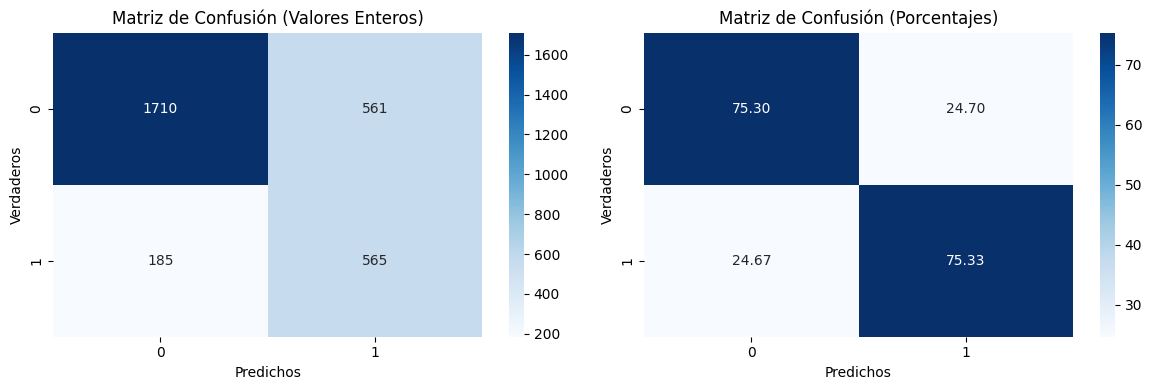

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Matriz de confusión con valores enteros
sns.heatmap(LogReg_Confusion, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_ylabel('Verdaderos')
axes[0].set_xlabel('Predichos')
axes[0].set_title('Matriz de Confusión (Valores Enteros)')

# Matriz de confusión en porcentajes
sns.heatmap(LogReg_Confusion_Percent, annot=True, fmt='.2f', cmap='Blues', ax=axes[1])
axes[1].set_ylabel('Verdaderos')
axes[1].set_xlabel('Predichos')
axes[1].set_title('Matriz de Confusión (Porcentajes)')

plt.tight_layout()
plt.show()

In [17]:
LogReg_class_report = classification_report(y_test_class, LogReg_Pred)
print("\nInforme de Clasificación:")
print(LogReg_class_report)


Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      2271
           1       0.50      0.75      0.60       750

    accuracy                           0.75      3021
   macro avg       0.70      0.75      0.71      3021
weighted avg       0.80      0.75      0.77      3021



In [18]:
y_probs = LogReg_Model.predict_proba(X_test_class)[:, 1]
# Calculo la ROC y el AUC
fpr, tpr, thresholds = roc_curve(y_test_class, y_probs)
roc_auc_LG = auc(fpr, tpr)

In [19]:
roc_auc_LG

0.8347418171143401

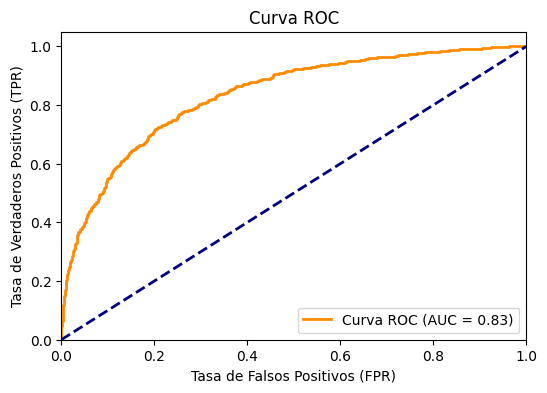

In [20]:
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc_LG)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

## Implementar un modelo base para clasificación y uno para regresión.


Para regresion elegiremos prediccion por media o mediana y para clasificacion un random classifier

In [21]:
data = pd.read_csv('data.csv')

In [22]:
def Mean_Pred(data):
    target = data["Rainfall"]
    prediction_result = target.mean()
    return prediction_result

def Median_Pred(data):
    target = data["Rainfall"]
    prediction_result = target.median()
    return prediction_result

mean_pred = Mean_Pred(data)
median_pred = Median_Pred(data)

In [23]:
print(f"Segun el modelo simple de media, la prediccion de lluvia para mañana es de: {mean_pred} mm. \nSegun el modelo simple de mediana , la prediccion de lluvia para mañana es de: {median_pred} mm.")

Segun el modelo simple de media, la prediccion de lluvia para mañana es de: 2.303743667346536 mm. 
Segun el modelo simple de mediana , la prediccion de lluvia para mañana es de: 0.0 mm.


Volvemos a calcular con los datos con lluvia mayores a 0

In [24]:
data_1 = data[data["Rainfall"] > 0]

In [25]:
median_pred_1 = Median_Pred(data_1)
media_pred_1 = Mean_Pred(data_1)

In [26]:
print(f"Segun el modelo simple de media, la prediccion de lluvia para mañana es de: {media_pred_1} mm. \nSegun el modelo simple de mediana , la prediccion de lluvia para mañana es de: {median_pred_1} mm.")

Segun el modelo simple de media, la prediccion de lluvia para mañana es de: 6.363976735732462 mm. 
Segun el modelo simple de mediana , la prediccion de lluvia para mañana es de: 2.2 mm.


Vamos con el random classifier

In [27]:
possible_answers = data["RainTomorrow"].dropna().unique().tolist()


In [28]:
possible_answers

['Yes', 'No']

In [29]:
def random_predict(answers):
    eleccion = random.choice(answers)
    if eleccion == "Yes":
        respuesta = "Mañana va llover."
    else:
        respuesta = "Mañana no va a llover."
    return respuesta

In [30]:
print(random_predict(possible_answers))

Mañana no va a llover.


Correr esta celda para chequear que efectivamente es random

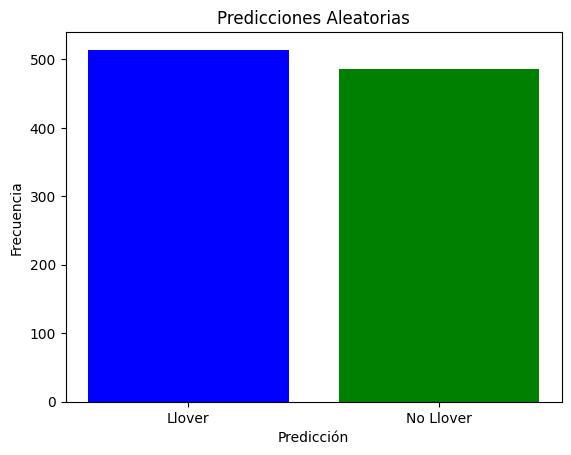

In [31]:
predicciones = [random_predict(possible_answers) for _ in range(1000)]

contador_llover = predicciones.count("Mañana va llover.")

etiquetas = ["Llover", "No Llover"]
valores = [contador_llover, 1000 - contador_llover]

plt.bar(etiquetas, valores, color=['blue', 'green'])
plt.title('Predicciones Aleatorias')
plt.xlabel('Predicción')
plt.ylabel('Frecuencia')
plt.show()

## Red Neuronal Para Clasificacion

In [32]:
X_train_class_scld = preprocessor_Class.fit_transform(X_train_class)
X_test_class_scld = preprocessor_Class.transform(X_test_class)

In [33]:
dim = X_train_class_scld.shape[1]

In [34]:
model_class = tf.keras.Sequential([
tf.keras.layers.Dense(units=64, input_dim=dim, activation='relu'),
tf.keras.layers.Dropout(0.5),  # Agregar Dropout para regularización
tf.keras.layers.Dense(units=32, activation='relu'),
tf.keras.layers.Dropout(0.5),  # Agregar Dropout para regularización
tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model_class.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_class.fit(X_train_class_scld, y_train_class, epochs=100, batch_size=32, verbose=1)




Epoch 1/100




382/382 [==============================] - 3s 3ms/step - loss: 0.4738 - accuracy: 0.7821
Epoch 2/100
382/382 [==============================] - 1s 3ms/step - loss: 0.4298 - accuracy: 0.8111
Epoch 3/100
382/382 [==============================] - 1s 3ms/step - loss: 0.4215 - accuracy: 0.8157
Epoch 4/100
382/382 [==============================] - 1s 3ms/step - loss: 0.4132 - accuracy: 0.8232
Epoch 5/100
382/382 [==============================] - 1s 2ms/step - loss: 0.4083 - accuracy: 0.8245
Epoch 6/100
382/382 [==============================] - 1s 2ms/step - loss: 0.4001 - accuracy: 0.8278
Epoch 7/100
382/382 [==============================] - 1s 2ms/step - loss: 0.4008 - accuracy: 0.8289
Epoch 8/100
382/382 [==============================] - 1s 2ms/step - loss: 0.3966 - accuracy: 0.8296
Epoch 9/100
382/382 [==============================] - 1s 2ms/step - loss: 0.3960 - accuracy: 0.8312
Epoch 10/100
382/382 [==============================] - 1s 2ms/step - loss: 0.3928 - accuracy: 0.8303

In [35]:
predictions = model_class.predict(X_test_class_scld)

95/95 [==============================] - 0s 2ms/step


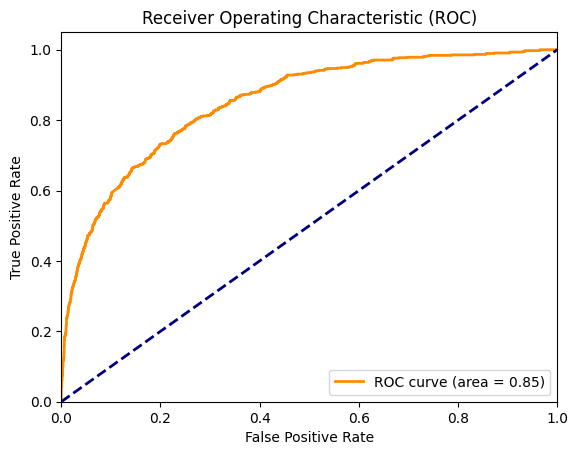

In [36]:
# Visualizar la curva ROC
fpr, tpr, thresholds = roc_curve(y_test_class, predictions)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

Podemos binarizar las respuestas que vienen entre 0 - 1 usando un umbral de 0.5

In [37]:
predictions_binary = (predictions >= 0.5).astype(int)

# Crear la matriz de confusión
conf_matrix_nn = confusion_matrix(y_test_class, predictions_binary)


# Crear el informe de clasificación
class_report_NN = classification_report(y_test_class, predictions_binary)
print("\nInforme de Clasificación:")
print(class_report_NN)


Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      2271
           1       0.75      0.45      0.56       750

    accuracy                           0.83      3021
   macro avg       0.80      0.70      0.73      3021
weighted avg       0.82      0.83      0.81      3021



In [38]:
print("Classification Report - Logistic Regression:")
print(LogReg_class_report)

print("\nClassification Report - Neural Network:")
print(class_report_NN)

Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      2271
           1       0.50      0.75      0.60       750

    accuracy                           0.75      3021
   macro avg       0.70      0.75      0.71      3021
weighted avg       0.80      0.75      0.77      3021


Classification Report - Neural Network:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      2271
           1       0.75      0.45      0.56       750

    accuracy                           0.83      3021
   macro avg       0.80      0.70      0.73      3021
weighted avg       0.82      0.83      0.81      3021



In [39]:
NN_Confusion_Percent = conf_matrix_nn / conf_matrix_nn.sum(axis=1)[:, np.newaxis] * 100

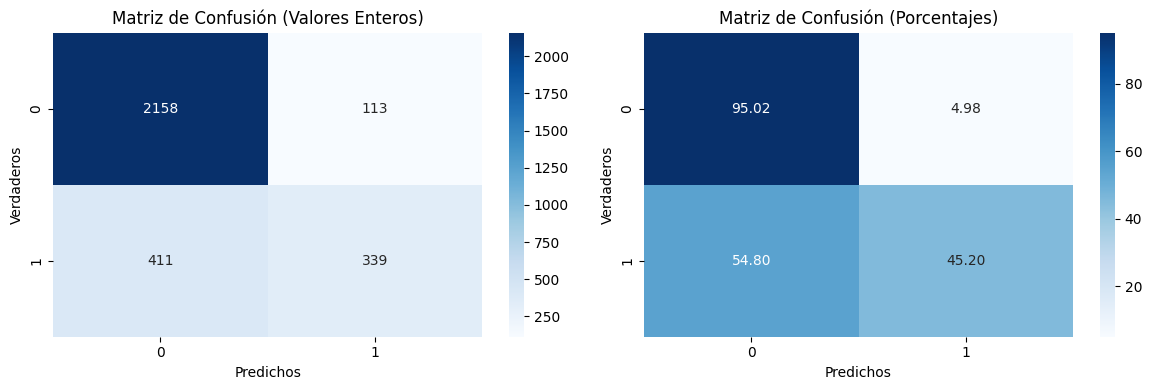

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Matriz de confusión con valores enteros
sns.heatmap(conf_matrix_nn, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_ylabel('Verdaderos')
axes[0].set_xlabel('Predichos')
axes[0].set_title('Matriz de Confusión (Valores Enteros)')

# Matriz de confusión en porcentajes
sns.heatmap(NN_Confusion_Percent, annot=True, fmt='.2f', cmap='Blues', ax=axes[1])
axes[1].set_ylabel('Verdaderos')
axes[1].set_xlabel('Predichos')
axes[1].set_title('Matriz de Confusión (Porcentajes)')

plt.tight_layout()
plt.show()

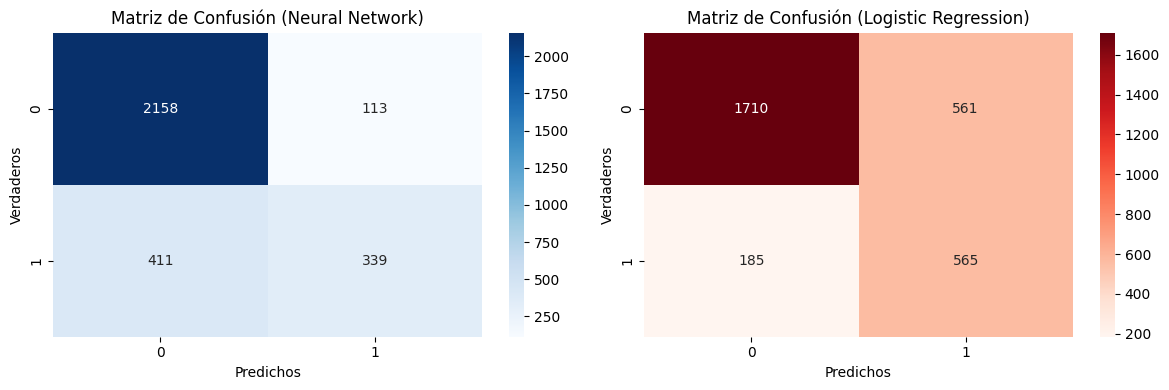

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Matriz de confusión NN
sns.heatmap(conf_matrix_nn, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_ylabel('Verdaderos')
axes[0].set_xlabel('Predichos')
axes[0].set_title('Matriz de Confusión (Neural Network)')

# Matriz de confusión Logistic Regression
sns.heatmap(LogReg_Confusion, annot=True, fmt='d', cmap='Reds', ax=axes[1])
axes[1].set_ylabel('Verdaderos')
axes[1].set_xlabel('Predichos')
axes[1].set_title('Matriz de Confusión (Logistic Regression)')

plt.tight_layout()
plt.show()

In [42]:
accuracy_NN = accuracy_score(y_test_class, predictions_binary)
recall_NN = recall_score(y_test_class, predictions_binary)
f1_NN = f1_score(y_test_class, predictions_binary)

In [43]:
print(accuracy_NN, recall_NN , f1_NN)

0.8265475008275406 0.452 0.5640599001663894


Considerando que ambos modelos funcionan muy bien, en teoria, y muy similares para predecir si va a llover o no mañana.
El modelo elegido para produccion va a ser la Red Neuronal

In [44]:
explainer = shap.Explainer(
    model_class, X_train_class_scld, feature_names=preprocessor_Class.get_feature_names_out()
)
shap_values = explainer(X_test_class_scld)

PermutationExplainer explainer: 3022it [03:25, 14.32it/s]                          


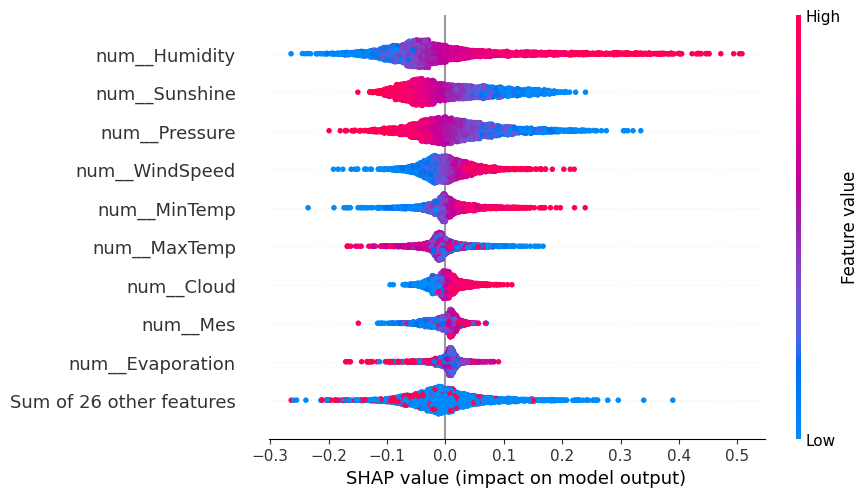

In [45]:
shap.plots.beeswarm(shap_values)

In [46]:
ind = 1
shap.initjs()
shap.plots.force(shap_values[ind])

Exportamos el modelo y el transforme

In [47]:
joblib.dump(model_class , 'NN_Classificator.pkl')
joblib.dump(preprocessor_Class , 'Preprocessor_class.pkl')

['Preprocessor_class.pkl']